## Loading Dataset

In [1]:
# Loading the dataset

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


file_path = 'original_housing_price_dataset.csv'

# Load the dataset into a Pandas DataFrame
housing_data = pd.read_csv(file_path)






## Preprocessing the Dataset

In [24]:
#Preprocessing the dataset


# Convert 'neighborhood' to categorical values
neighborhood_map = {'Rural': 0, 'Urban': 1, 'Suburb': 2}
housing_data['Neighborhood_Category'] = housing_data['Neighborhood'].map(neighborhood_map)

housing_data = housing_data[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood_Category', 'YearBuilt', 'Price']]


# # Normalize the numerical features
scaler = MinMaxScaler()
numerical_features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood_Category', 'YearBuilt']
housing_data[numerical_features] = scaler.fit_transform(housing_data[numerical_features])

# Round the column after normalization
housing_data['Bedrooms'] = housing_data['Bedrooms'].round(2)
housing_data['YearBuilt'] = housing_data['YearBuilt'].round(2)
housing_data['SquareFeet'] = housing_data['SquareFeet'].round(2)

# Save the preprocessed data to CSV file
housing_data.to_csv('housing_price_dataset.csv', index=False)

## KNearestNeighbours Model Training


In [2]:
# Load preprocessed dataset
data = pd.read_csv('housing_price_dataset.csv')
print(data.head())

# Features and target
features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood_Category', 'YearBuilt']
target = 'Price'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the KNN model
k = 5

knn_model = KNeighborsRegressor(n_neighbors=k, metric='euclidean') 
knn_model.fit(X_train, y_train)

   SquareFeet  Bedrooms  Bathrooms  Neighborhood_Category  YearBuilt  \
0        0.56      0.67        0.0                    0.0       0.27   
1        0.73      0.33        0.5                    0.0       0.42   
2        0.43      0.00        0.0                    1.0       0.28   
3        0.65      0.00        0.0                    0.5       0.65   
4        0.57      1.00        0.5                    1.0       0.72   

         Price  
0  215355.2836  
1  195014.2216  
2  306891.0121  
3  206786.7872  
4  272436.2391  


KNeighborsRegressor(metric='euclidean')

## Model Prediction

In [3]:
import numpy as np
y_train_pred= knn_model.predict(X_train)
y_pred = knn_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")

train_comparison_df = pd.DataFrame({'Actual Train Value': y_train.round(2), 'Predicted Train Value': y_train_pred.round(2)})
print(train_comparison_df)

test_comparison_df = pd.DataFrame({'Actual Test Value': y_test.round(2), 'Predicted Test Value': y_pred.round(2)})
print(test_comparison_df)


Training RMSE: 44663.38
Testing RMSE: 54512.57
       Actual Train Value  Predicted Train Value
27434           356225.63              228670.27
13400           285884.91              240127.76
883             206852.13              151267.02
7303            234912.37              235354.17
45124           178061.31              261676.46
...                   ...                    ...
11284           324396.85              271176.45
44732           319266.94              298170.11
38158           248092.66              299824.34
860             132414.18              218080.32
15795           288751.05              317263.48

[37500 rows x 2 columns]
       Actual Test Value  Predicted Test Value
33553          170835.04             232761.90
9427           126913.47             151870.04
199            246611.88             261949.87
12447          244250.46             249310.83
39489          271127.65             283781.51
...                  ...                   ...
9771      

## Visualization using Scatter Plot

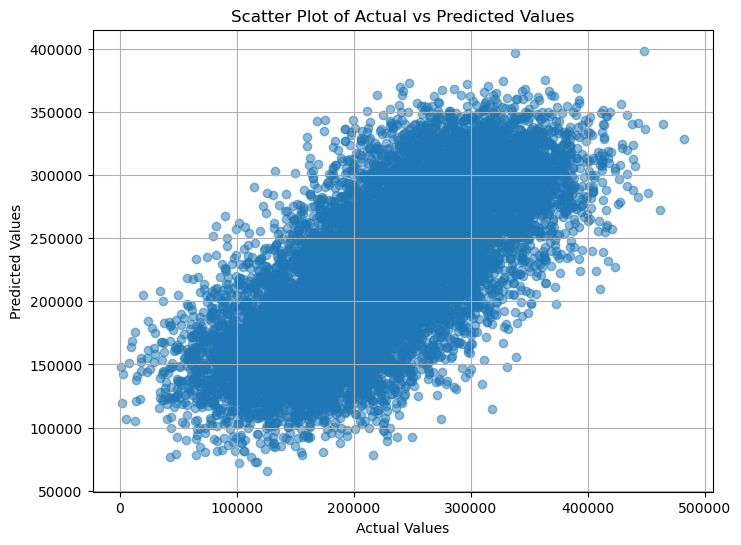

In [4]:
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.grid(True)
plt.show()

Conclusions: 

 Points aligned along the diagonal line, facing upwards, indicate a positive correlation between the actual and predicted values. 
 
 A tight cluster around the diagonal indicates that the model's predictions are consistently close to the actual values, indicating a higher level of accuracy. 
 
 The presence of very few outliers suggests that the model generally performs well in predicting house prices
 
  An RMSE of 44690.85 means, on average, the model's predictions in the training set deviate by approximately $44690.85 from the actual house prices.
  
 An RMSE of 54535.80 indicates that, on average, the model's predictions in the testing set deviate by approximately $54535.80 from the actual house prices.
 
 The Testing RMSE is slightly higher than the Training RMSE, which is expected as models often perform slightly worse on unseen data compared to the data they were trained on. However, the difference isn't excessively large, suggesting the model might not be overfitting significantly.